## Import necessary packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

from sklearn import preprocessing
import matplotlib.pyplot as plt

from cyclum.models.misc import cyclops

from cyclum.hdfrw import hdf2mat, mat2hdf

Using TensorFlow backend.


In [3]:
df = hdf2mat('/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSE125416-regular.h5')
print(f"Running on {df.shape[0]} cells and {df.shape[1]} genes.")

Running on 12280 cells and 33694 genes.


In [6]:
df.std(axis=0).shape

(33694,)

In [7]:
data = cyclops.prep(df.loc[:, df.std(axis=0) > 0].values, variance_kept = 0.85)
data = skl.preprocessing.scale(data)

[0.05286752 0.0704447  0.08345301 ... 0.99999957 0.99999979 1.        ]


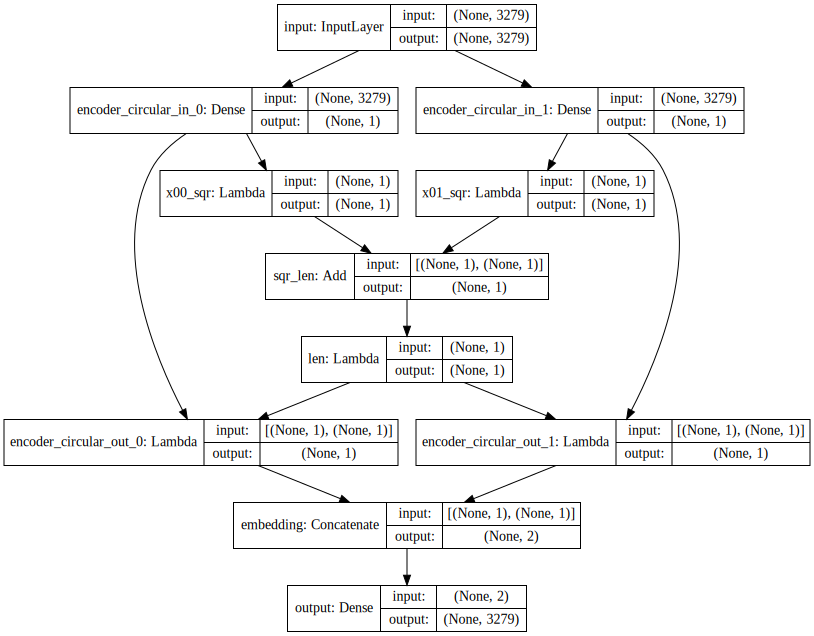

In [8]:
model = cyclops(data.shape[1])
display(model.show_structure())

In [9]:
model.train(data, epochs=400, verbose=20, rate=2e-4)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


epoch: 20/400, loss:  0.9995, time elapsed:  61.85s, time left:  1175.15s
epoch: 40/400, loss:  0.9995, time elapsed:  103.56s, time left:  932.04s
epoch: 60/400, loss:  0.9995, time elapsed:  145.53s, time left:  824.69s
epoch: 80/400, loss:  0.9995, time elapsed:  186.96s, time left:  747.83s
epoch: 100/400, loss:  0.9995, time elapsed:  229.01s, time left:  687.03s
epoch: 120/400, loss:  0.9995, time elapsed:  270.73s, time left:  631.69s
epoch: 140/400, loss:  0.9995, time elapsed:  312.20s, time left:  579.80s
epoch: 160/400, loss:  0.9995, time elapsed:  353.71s, time left:  530.57s
epoch: 180/400, loss:  0.9995, time elapsed:  395.40s, time left:  483.26s
epoch: 200/400, loss:  0.9995, time elapsed:  437.70s, time left:  437.70s
epoch: 220/400, loss:  0.9995, time elapsed:  480.77s, time left:  393.36s
epoch: 240/400, loss:  0.9995, time elapsed:  522.24s, time left:  348.16s
epoch: 

In [10]:
pseudotime = model.predict_pseudotime(data)


Note that this metric, although similar, is not exactly the same as the one we reported using mclust in R.

We use a non-parametric parzen window method to estimate the distribution here, 
while mclust uses a parametric normal mixture.

In [11]:

mat2hdf(pseudotime, '/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSE125416-cyclops-pseudotime.h5')